In [37]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.model_selection import KFold,train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass = pd.read_csv("glass.csv")

In [5]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [50]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


# here K and Ca have zero correlation with Type so drop them

In [59]:
glass1=glass.drop(['K','Ca'],axis=1)

# Data understanding

In [62]:
glass1.shape

(214, 8)

In [63]:
glass1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# model building 

In [64]:
X = glass1.drop("Type",axis=1)
X

,RI,Na,Mg,Al,Si,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0
...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,1.57,0.0


In [65]:
y = glass1[["Type"]]
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [67]:
X_train.shape , y_train.shape

((171, 7), (171, 1))

In [68]:
X_test.shape , y_test.shape

((43, 7), (43, 1))

# 5.Model Training
#Before standarzation

In [70]:
#for k=3
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# 6.model testing


In [72]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6046511627906976

In [73]:
#for k=5
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5813953488372093

#After Standarzation


In [75]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scaled_X = std_scalar.fit_transform(X)

In [76]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

In [77]:
#for k=3
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7209302325581395

In [78]:
#for k=5
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6046511627906976

#after my accuracy is increased 

In [80]:
#after my accuracy is increased 

# how to choose the optimal value for k?


In [82]:
cv_score = []

for i in range(1,31,1):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    kfold = KFold(n_splits=5 , shuffle=True,random_state=12)
    cross_validation_score= cross_val_score(estimator=knn_model,X=scaled_X,y=y,cv=kfold)
    cv_score.append(cross_validation_score.mean().round(5))

In [83]:
cv_score

[0.68128,
 0.65814,
 0.69136,
 0.68649,
 0.65371,
 0.64441,
 0.64917,
 0.6443,
 0.63023,
 0.64419,
 0.63012,
 0.62525,
 0.62071,
 0.63466,
 0.63012,
 0.61152,
 0.6021,
 0.61141,
 0.58339,
 0.59745,
 0.57885,
 0.5928,
 0.58815,
 0.58372,
 0.58815,
 0.58815,
 0.58361,
 0.5742,
 0.60244,
 0.58372]

In [84]:
max(cv_score)

0.69136

In [85]:
from matplotlib import pyplot as plt 

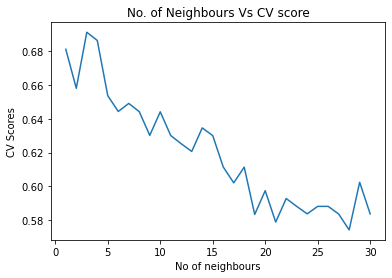

In [86]:
plt.plot(range(1,31),cv_score)
plt.xlabel("No of neighbours")
plt.ylabel("CV Scores")
plt.title("No. of Neighbours Vs CV score")
plt.show()

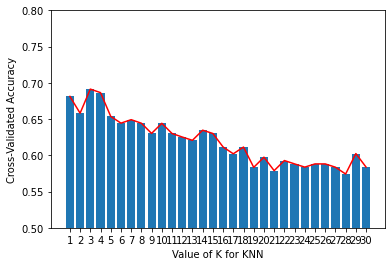

In [90]:
import matplotlib.pyplot as plt 

# plot to see clearly
plt.bar(range(1,31,1), cv_score),
plt.plot(range(1,31,1), cv_score,color="red")


#plt.figure(figsize=(15,7))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(range(1,31,1))
plt.ylim(0.5,0.8)
plt.show()

#the optimal value of is 4